**Final Project - London Sightseeing**

**Group 6**

# London Tour Optimiser

Lockdown is going for a while now.  After a long winter, we can’t wait to get out and explore the proper London.  But between assignments and capstone projects, we will have to use our free time efficiently to get the most out of it. We will customize a London tour route according to the user's preference for visiting location, time, budget and transportation mode. To use the prototype, click Cell > Run All, and key in preferences of: 

- Top 12 tourist attractions in London (scale of 1,2,...,10)
- Starting/Ending time (in the form of HH:MM)
- Expected max. budget for tourist attractions
- Expected max. no. of walking miles
- Expected max. no. of cycling miles
- Expected max. of budget for transportation

Scroll to the bottom for your own personalized route!



## Preferences

In [1]:
#Location
BP = int(input("Preference for Buckingham Palace: "))
TB = int(input("Preference for The Tower of London and Tower Bridge: "))
BM = int(input("Preference for The British Museum: "))
BB = int(input("Preference for Big Ben and Parliament: "))
NG = int(input("Preference for National Gallery: "))
VAM = int(input("Preference for The Victoria and Albert Museum: "))
PC = int(input("Preference for Piccadilly Circus and Trafalgar Square: "))
TS = int(input("Preference for The Shard: "))
WA = int(input("Preference for Westminster Abbey: "))
NHM = int(input("Preference for Natural History Museum: "))
HP = int(input("Preference for Hyde Park: "))
SPC = int(input("Preference for St. Paul's Cathedral: "))
CG = int(input("Preference for Covent Garden: "))
#Time
Time_Startin = input("Please tell us what time you plan to start the trip at: ")
Time_Endin = input("Please tell us what time you plan to end the trip at: ")
#Budget
Budget = float(input("Please tell us your budget for the trip: "))
#Transportation
Walk = float(input("Please tell us how many miles you plan to walk in total (1 mile = 20 mins): "))
Bike = float(input("Please tell us how many miles you plan to cycle in total (1 mile = 4 mins): "))
transportation_budget = float(input("Please tell us your budget for the transportation: "))

Preference for Buckingham Palace: 9
Preference for The Tower of London and Tower Bridge: 8
Preference for The British Museum: 7
Preference for Big Ben and Parliament: 8
Preference for National Gallery: 7
Preference for The Victoria and Albert Museum: 5
Preference for Piccadilly Circus and Trafalgar Square: 6
Preference for The Shard: 6
Preference for Westminster Abbey: 4
Preference for Natural History Museum: 10
Preference for Hyde Park: 8
Preference for St. Paul's Cathedral: 9
Preference for Covent Garden: 7
Please tell us what time you plan to start the trip at: 08:00
Please tell us what time you plan to end the trip at: 16:30
Please tell us your budget for the trip: 200
Please tell us how many miles you plan to walk in total (1 mile = 20 mins): 10
Please tell us how many miles you plan to cycle in total (1 mile = 4 mins): 4
Please tell us your budget for the transportation: 50


# Loading Data

In [2]:
# Import various packages
import pandas as pd
import numpy as np
import folium # visualisation package for spatial data (plot of maps)
import seaborn as sns # general visualization package 
import matplotlib.pyplot as plt # general visualization package 
#next command allows you to display the figures in the notebook
%matplotlib inline     
import datetime
import time
#import googlemaps

In [3]:
# In order to facilitate the calculation later, here, we will convert all the time to int.
Time_Start = int(Time_Startin.split(':')[0])*60+int(Time_Startin.split(':')[1])
Time_End = int(Time_Endin.split(':')[0])*60+int(Time_Endin.split(':')[1])

In [4]:
location = ['Buckingham Palace','Tower of London','British Museum','Big Ben','National Gallery','Victoria and Albert Museum',\
           'Trafalgar Square','Shard','Westminster Abbey','Natural History Museum','Hyde Park','St. Paul','Covent Garden']

In [5]:
# Preference for each location
preference = {
    'Buckingham Palace':BP,
    'Tower of London':TB,
    'British Museum':BM,
    'Big Ben':BB,
    'National Gallery':NG,
    'Victoria and Albert Museum':VAM,
    'Trafalgar Square':PC,
    'Shard':TS,
    'Westminster Abbey':WA,
    'Natural History Museum':NHM,
    'Hyde Park':HP,
    'St. Paul':SPC,
    'Covent Garden':CG
}

In [6]:
# Ticket price for each location
# Adult fares are used. 
# The data comes from https://www.londoncitybreak.com/
ticket_price = {
    'Buckingham Palace':26.50,
    'Tower of London':25,
    'British Museum':0,
    'Big Ben':19.50,
    'National Gallery':0,
    'Victoria and Albert Museum':0,
    'Trafalgar Square':0,
    'Shard':32,
    'Westminster Abbey':18,
    'Natural History Museum':0,
    'Hyde Park':0,
    'St. Paul':18,
    'Covent Garden':0
}

In [7]:
# Average time spent in each location in minutes
# The data is comes from https://www.londontoolkit.com/
visit_time = {
    'Buckingham Palace':120,
    'Tower of London':60,
    'British Museum':180,
    'Big Ben':30,
    'National Gallery':180,
    'Victoria and Albert Museum':60,
    'Trafalgar Square':20,
    'Shard':45,
    'Westminster Abbey':120,
    'Natural History Museum':180,
    'Hyde Park':120,
    'St. Paul':120,
    'Covent Garden':120
}

In [8]:
# Operating hours for each location
# Manually changed to integer (60*hour+minute)
# The data comes from https://www.londoncitybreak.com/
operating_hours = {
    'Buckingham Palace':(570, 1050),
    'Tower of London':(600, 1020),
    'British Museum':(600, 1050),
    'Big Ben':(555, 990),
    'National Gallery':(600, 1080),
    'Victoria and Albert Museum':(600, 1065),
    'Trafalgar Square':(0, 1439),
    'Shard':(600, 1320),
    'Westminster Abbey':(570, 1080),
    'Natural History Museum':(600, 1050),
    'Hyde Park':(0, 1439),
    'St. Paul':(510, 990),
    'Covent Garden':(0, 1439)
}

Next, we obtained the time required to use for different modes of transportation between the two locations from the google map API. In order to make this code easy for everyone to run, without the need to apply for an API, we copied and pasted the results into a dictionary. 

If you are interested in how we use the google map API, you can view the code we use in appendix. 

In [9]:
# Walk times in minutes
walk = {('Buckingham Palace', 'Buckingham Palace'): 0,
 ('Buckingham Palace', 'Tower of London'): 71,
 ('Buckingham Palace', 'British Museum'): 36,
 ('Buckingham Palace', 'Big Ben'): 29,
 ('Buckingham Palace', 'National Gallery'): 19,
 ('Buckingham Palace', 'Victoria and Albert Museum'): 34,
 ('Buckingham Palace', 'Trafalgar Square'): 21,
 ('Buckingham Palace', 'Shard'): 58,
 ('Buckingham Palace', 'Westminster Abbey'): 28,
 ('Buckingham Palace', 'Natural History Museum'): 38,
 ('Buckingham Palace', 'Hyde Park'): 28,
 ('Buckingham Palace', 'St. Paul'): 47,
 ('Buckingham Palace', 'Covent Garden'): 30,
 ('Tower of London', 'Buckingham Palace'): 70,
 ('Tower of London', 'Tower of London'): 0,
 ('Tower of London', 'British Museum'): 55,
 ('Tower of London', 'Big Ben'): 41,
 ('Tower of London', 'National Gallery'): 54,
 ('Tower of London', 'Victoria and Albert Museum'): 100,
 ('Tower of London', 'Trafalgar Square'): 52,
 ('Tower of London', 'Shard'): 14,
 ('Tower of London', 'Westminster Abbey'): 62,
 ('Tower of London', 'Natural History Museum'): 104,
 ('Tower of London', 'Hyde Park'): 92,
 ('Tower of London', 'St. Paul'): 27,
 ('Tower of London', 'Covent Garden'): 48,
 ('British Museum', 'Buckingham Palace'): 34,
 ('British Museum', 'Tower of London'): 53,
 ('British Museum', 'British Museum'): 0,
 ('British Museum', 'Big Ben'): 18,
 ('British Museum', 'National Gallery'): 18,
 ('British Museum', 'Victoria and Albert Museum'): 58,
 ('British Museum', 'Trafalgar Square'): 24,
 ('British Museum', 'Shard'): 51,
 ('British Museum', 'Westminster Abbey'): 45,
 ('British Museum', 'Natural History Museum'): 62,
 ('British Museum', 'Hyde Park'): 42,
 ('British Museum', 'St. Paul'): 28,
 ('British Museum', 'Covent Garden'): 8,
 ('Big Ben', 'Buckingham Palace'): 29,
 ('Big Ben', 'Tower of London'): 42,
 ('Big Ben', 'British Museum'): 19,
 ('Big Ben', 'Big Ben'): 0,
 ('Big Ben', 'National Gallery'): 13,
 ('Big Ben', 'Victoria and Albert Museum'): 58,
 ('Big Ben', 'Trafalgar Square'): 11,
 ('Big Ben', 'Shard'): 34,
 ('Big Ben', 'Westminster Abbey'): 35,
 ('Big Ben', 'Natural History Museum'): 63,
 ('Big Ben', 'Hyde Park'): 50,
 ('Big Ben', 'St. Paul'): 21,
 ('Big Ben', 'Covent Garden'): 11,
 ('National Gallery', 'Buckingham Palace'): 18,
 ('National Gallery', 'Tower of London'): 54,
 ('National Gallery', 'British Museum'): 19,
 ('National Gallery', 'Big Ben'): 12,
 ('National Gallery', 'National Gallery'): 0,
 ('National Gallery', 'Victoria and Albert Museum'): 46,
 ('National Gallery', 'Trafalgar Square'): 9,
 ('National Gallery', 'Shard'): 43,
 ('National Gallery', 'Westminster Abbey'): 29,
 ('National Gallery', 'Natural History Museum'): 50,
 ('National Gallery', 'Hyde Park'): 39,
 ('National Gallery', 'St. Paul'): 30,
 ('National Gallery', 'Covent Garden'): 12,
 ('Victoria and Albert Museum', 'Buckingham Palace'): 32,
 ('Victoria and Albert Museum', 'Tower of London'): 99,
 ('Victoria and Albert Museum', 'British Museum'): 60,
 ('Victoria and Albert Museum', 'Big Ben'): 58,
 ('Victoria and Albert Museum', 'National Gallery'): 46,
 ('Victoria and Albert Museum', 'Victoria and Albert Museum'): 0,
 ('Victoria and Albert Museum', 'Trafalgar Square'): 50,
 ('Victoria and Albert Museum', 'Shard'): 87,
 ('Victoria and Albert Museum', 'Westminster Abbey'): 54,
 ('Victoria and Albert Museum', 'Natural History Museum'): 4,
 ('Victoria and Albert Museum', 'Hyde Park'): 26,
 ('Victoria and Albert Museum', 'St. Paul'): 75,
 ('Victoria and Albert Museum', 'Covent Garden'): 54,
 ('Trafalgar Square', 'Buckingham Palace'): 21,
 ('Trafalgar Square', 'Tower of London'): 52,
 ('Trafalgar Square', 'British Museum'): 26,
 ('Trafalgar Square', 'Big Ben'): 11,
 ('Trafalgar Square', 'National Gallery'): 9,
 ('Trafalgar Square', 'Victoria and Albert Museum'): 50,
 ('Trafalgar Square', 'Trafalgar Square'): 0,
 ('Trafalgar Square', 'Shard'): 40,
 ('Trafalgar Square', 'Westminster Abbey'): 25,
 ('Trafalgar Square', 'Natural History Museum'): 55,
 ('Trafalgar Square', 'Hyde Park'): 45,
 ('Trafalgar Square', 'St. Paul'): 31,
 ('Trafalgar Square', 'Covent Garden'): 18,
 ('Shard', 'Buckingham Palace'): 57,
 ('Shard', 'Tower of London'): 15,
 ('Shard', 'British Museum'): 52,
 ('Shard', 'Big Ben'): 34,
 ('Shard', 'National Gallery'): 44,
 ('Shard', 'Victoria and Albert Museum'): 87,
 ('Shard', 'Trafalgar Square'): 40,
 ('Shard', 'Shard'): 0,
 ('Shard', 'Westminster Abbey'): 50,
 ('Shard', 'Natural History Museum'): 92,
 ('Shard', 'Hyde Park'): 81,
 ('Shard', 'St. Paul'): 25,
 ('Shard', 'Covent Garden'): 43,
 ('Westminster Abbey', 'Buckingham Palace'): 27,
 ('Westminster Abbey', 'Tower of London'): 67,
 ('Westminster Abbey', 'British Museum'): 45,
 ('Westminster Abbey', 'Big Ben'): 33,
 ('Westminster Abbey', 'National Gallery'): 28,
 ('Westminster Abbey', 'Victoria and Albert Museum'): 53,
 ('Westminster Abbey', 'Trafalgar Square'): 23,
 ('Westminster Abbey', 'Shard'): 48,
 ('Westminster Abbey', 'Westminster Abbey'): 0,
 ('Westminster Abbey', 'Natural History Museum'): 57,
 ('Westminster Abbey', 'Hyde Park'): 53,
 ('Westminster Abbey', 'St. Paul'): 53,
 ('Westminster Abbey', 'Covent Garden'): 38,
 ('Natural History Museum', 'Buckingham Palace'): 37,
 ('Natural History Museum', 'Tower of London'): 104,
 ('Natural History Museum', 'British Museum'): 64,
 ('Natural History Museum', 'Big Ben'): 62,
 ('Natural History Museum', 'National Gallery'): 50,
 ('Natural History Museum', 'Victoria and Albert Museum'): 4,
 ('Natural History Museum', 'Trafalgar Square'): 54,
 ('Natural History Museum', 'Shard'): 91,
 ('Natural History Museum', 'Westminster Abbey'): 59,
 ('Natural History Museum', 'Natural History Museum'): 0,
 ('Natural History Museum', 'Hyde Park'): 27,
 ('Natural History Museum', 'St. Paul'): 80,
 ('Natural History Museum', 'Covent Garden'): 58,
 ('Hyde Park', 'Buckingham Palace'): 25,
 ('Hyde Park', 'Tower of London'): 92,
 ('Hyde Park', 'British Museum'): 42,
 ('Hyde Park', 'Big Ben'): 50,
 ('Hyde Park', 'National Gallery'): 38,
 ('Hyde Park', 'Victoria and Albert Museum'): 25,
 ('Hyde Park', 'Trafalgar Square'): 42,
 ('Hyde Park', 'Shard'): 80,
 ('Hyde Park', 'Westminster Abbey'): 54,
 ('Hyde Park', 'Natural History Museum'): 26,
 ('Hyde Park', 'Hyde Park'): 0,
 ('Hyde Park', 'St. Paul'): 67,
 ('Hyde Park', 'Covent Garden'): 43,
 ('St. Paul', 'Buckingham Palace'): 45,
 ('St. Paul', 'Tower of London'): 26,
 ('St. Paul', 'British Museum'): 29,
 ('St. Paul', 'Big Ben'): 20,
 ('St. Paul', 'National Gallery'): 29,
 ('St. Paul', 'Victoria and Albert Museum'): 75,
 ('St. Paul', 'Trafalgar Square'): 31,
 ('St. Paul', 'Shard'): 25,
 ('St. Paul', 'Westminster Abbey'): 54,
 ('St. Paul', 'Natural History Museum'): 80,
 ('St. Paul', 'Hyde Park'): 68,
 ('St. Paul', 'St. Paul'): 0,
 ('St. Paul', 'Covent Garden'): 24,
 ('Covent Garden', 'Buckingham Palace'): 28,
 ('Covent Garden', 'Tower of London'): 47,
 ('Covent Garden', 'British Museum'): 8,
 ('Covent Garden', 'Big Ben'): 10,
 ('Covent Garden', 'National Gallery'): 11,
 ('Covent Garden', 'Victoria and Albert Museum'): 52,
 ('Covent Garden', 'Trafalgar Square'): 17,
 ('Covent Garden', 'Shard'): 43,
 ('Covent Garden', 'Westminster Abbey'): 38,
 ('Covent Garden', 'Natural History Museum'): 57,
 ('Covent Garden', 'Hyde Park'): 43,
 ('Covent Garden', 'St. Paul'): 23,
 ('Covent Garden', 'Covent Garden'): 0}

In [10]:
# Cycling times in minutes
bike = {('Buckingham Palace', 'Buckingham Palace'): 0,
 ('Buckingham Palace', 'Tower of London'): 25,
 ('Buckingham Palace', 'British Museum'): 14,
 ('Buckingham Palace', 'Big Ben'): 10,
 ('Buckingham Palace', 'National Gallery'): 7,
 ('Buckingham Palace', 'Victoria and Albert Museum'): 10,
 ('Buckingham Palace', 'Trafalgar Square'): 8,
 ('Buckingham Palace', 'Shard'): 20,
 ('Buckingham Palace', 'Westminster Abbey'): 13,
 ('Buckingham Palace', 'Natural History Museum'): 12,
 ('Buckingham Palace', 'Hyde Park'): 12,
 ('Buckingham Palace', 'St. Paul'): 19,
 ('Buckingham Palace', 'Covent Garden'): 12,
 ('Tower of London', 'Buckingham Palace'): 24,
 ('Tower of London', 'Tower of London'): 0,
 ('Tower of London', 'British Museum'): 20,
 ('Tower of London', 'Big Ben'): 12,
 ('Tower of London', 'National Gallery'): 18,
 ('Tower of London', 'Victoria and Albert Museum'): 31,
 ('Tower of London', 'Trafalgar Square'): 16,
 ('Tower of London', 'Shard'): 11,
 ('Tower of London', 'Westminster Abbey'): 24,
 ('Tower of London', 'Natural History Museum'): 33,
 ('Tower of London', 'Hyde Park'): 33,
 ('Tower of London', 'St. Paul'): 12,
 ('Tower of London', 'Covent Garden'): 19,
 ('British Museum', 'Buckingham Palace'): 14,
 ('British Museum', 'Tower of London'): 21,
 ('British Museum', 'British Museum'): 0,
 ('British Museum', 'Big Ben'): 10,
 ('British Museum', 'National Gallery'): 7,
 ('British Museum', 'Victoria and Albert Museum'): 18,
 ('British Museum', 'Trafalgar Square'): 9,
 ('British Museum', 'Shard'): 19,
 ('British Museum', 'Westminster Abbey'): 17,
 ('British Museum', 'Natural History Museum'): 25,
 ('British Museum', 'Hyde Park'): 22,
 ('British Museum', 'St. Paul'): 11,
 ('British Museum', 'Covent Garden'): 5,
 ('Big Ben', 'Buckingham Palace'): 11,
 ('Big Ben', 'Tower of London'): 13,
 ('Big Ben', 'British Museum'): 9,
 ('Big Ben', 'Big Ben'): 0,
 ('Big Ben', 'National Gallery'): 5,
 ('Big Ben', 'Victoria and Albert Museum'): 18,
 ('Big Ben', 'Trafalgar Square'): 3,
 ('Big Ben', 'Shard'): 12,
 ('Big Ben', 'Westminster Abbey'): 12,
 ('Big Ben', 'Natural History Museum'): 20,
 ('Big Ben', 'Hyde Park'): 20,
 ('Big Ben', 'St. Paul'): 7,
 ('Big Ben', 'Covent Garden'): 5,
 ('National Gallery', 'Buckingham Palace'): 8,
 ('National Gallery', 'Tower of London'): 20,
 ('National Gallery', 'British Museum'): 8,
 ('National Gallery', 'Big Ben'): 5,
 ('National Gallery', 'National Gallery'): 0,
 ('National Gallery', 'Victoria and Albert Museum'): 15,
 ('National Gallery', 'Trafalgar Square'): 3,
 ('National Gallery', 'Shard'): 16,
 ('National Gallery', 'Westminster Abbey'): 11,
 ('National Gallery', 'Natural History Museum'): 17,
 ('National Gallery', 'Hyde Park'): 17,
 ('National Gallery', 'St. Paul'): 9,
 ('National Gallery', 'Covent Garden'): 5,
 ('Victoria and Albert Museum', 'Buckingham Palace'): 10,
 ('Victoria and Albert Museum', 'Tower of London'): 32,
 ('Victoria and Albert Museum', 'British Museum'): 22,
 ('Victoria and Albert Museum', 'Big Ben'): 17,
 ('Victoria and Albert Museum', 'National Gallery'): 13,
 ('Victoria and Albert Museum', 'Victoria and Albert Museum'): 0,
 ('Victoria and Albert Museum', 'Trafalgar Square'): 15,
 ('Victoria and Albert Museum', 'Shard'): 27,
 ('Victoria and Albert Museum', 'Westminster Abbey'): 19,
 ('Victoria and Albert Museum', 'Natural History Museum'): 2,
 ('Victoria and Albert Museum', 'Hyde Park'): 10,
 ('Victoria and Albert Museum', 'St. Paul'): 26,
 ('Victoria and Albert Museum', 'Covent Garden'): 18,
 ('Trafalgar Square', 'Buckingham Palace'): 10,
 ('Trafalgar Square', 'Tower of London'): 18,
 ('Trafalgar Square', 'British Museum'): 12,
 ('Trafalgar Square', 'Big Ben'): 3,
 ('Trafalgar Square', 'National Gallery'): 5,
 ('Trafalgar Square', 'Victoria and Albert Museum'): 17,
 ('Trafalgar Square', 'Trafalgar Square'): 0,
 ('Trafalgar Square', 'Shard'): 17,
 ('Trafalgar Square', 'Westminster Abbey'): 10,
 ('Trafalgar Square', 'Natural History Museum'): 19,
 ('Trafalgar Square', 'Hyde Park'): 19,
 ('Trafalgar Square', 'St. Paul'): 11,
 ('Trafalgar Square', 'Covent Garden'): 8,
 ('Shard', 'Buckingham Palace'): 22,
 ('Shard', 'Tower of London'): 11,
 ('Shard', 'British Museum'): 18,
 ('Shard', 'Big Ben'): 12,
 ('Shard', 'National Gallery'): 16,
 ('Shard', 'Victoria and Albert Museum'): 28,
 ('Shard', 'Trafalgar Square'): 16,
 ('Shard', 'Shard'): 0,
 ('Shard', 'Westminster Abbey'): 18,
 ('Shard', 'Natural History Museum'): 35,
 ('Shard', 'Hyde Park'): 31,
 ('Shard', 'St. Paul'): 10,
 ('Shard', 'Covent Garden'): 15,
 ('Westminster Abbey', 'Buckingham Palace'): 15,
 ('Westminster Abbey', 'Tower of London'): 29,
 ('Westminster Abbey', 'British Museum'): 20,
 ('Westminster Abbey', 'Big Ben'): 14,
 ('Westminster Abbey', 'National Gallery'): 13,
 ('Westminster Abbey', 'Victoria and Albert Museum'): 21,
 ('Westminster Abbey', 'Trafalgar Square'): 12,
 ('Westminster Abbey', 'Shard'): 19,
 ('Westminster Abbey', 'Westminster Abbey'): 0,
 ('Westminster Abbey', 'Natural History Museum'): 21,
 ('Westminster Abbey', 'Hyde Park'): 24,
 ('Westminster Abbey', 'St. Paul'): 23,
 ('Westminster Abbey', 'Covent Garden'): 17,
 ('Natural History Museum', 'Buckingham Palace'): 15,
 ('Natural History Museum', 'Tower of London'): 37,
 ('Natural History Museum', 'British Museum'): 26,
 ('Natural History Museum', 'Big Ben'): 22,
 ('Natural History Museum', 'National Gallery'): 18,
 ('Natural History Museum', 'Victoria and Albert Museum'): 2,
 ('Natural History Museum', 'Trafalgar Square'): 20,
 ('Natural History Museum', 'Shard'): 32,
 ('Natural History Museum', 'Westminster Abbey'): 24,
 ('Natural History Museum', 'Natural History Museum'): 0,
 ('Natural History Museum', 'Hyde Park'): 11,
 ('Natural History Museum', 'St. Paul'): 31,
 ('Natural History Museum', 'Covent Garden'): 23,
 ('Hyde Park', 'Buckingham Palace'): 15,
 ('Hyde Park', 'Tower of London'): 37,
 ('Hyde Park', 'British Museum'): 21,
 ('Hyde Park', 'Big Ben'): 22,
 ('Hyde Park', 'National Gallery'): 19,
 ('Hyde Park', 'Victoria and Albert Museum'): 10,
 ('Hyde Park', 'Trafalgar Square'): 20,
 ('Hyde Park', 'Shard'): 33,
 ('Hyde Park', 'Westminster Abbey'): 22,
 ('Hyde Park', 'Natural History Museum'): 10,
 ('Hyde Park', 'Hyde Park'): 0,
 ('Hyde Park', 'St. Paul'): 31,
 ('Hyde Park', 'Covent Garden'): 23,
 ('St. Paul', 'Buckingham Palace'): 19,
 ('St. Paul', 'Tower of London'): 12,
 ('St. Paul', 'British Museum'): 10,
 ('St. Paul', 'Big Ben'): 8,
 ('St. Paul', 'National Gallery'): 13,
 ('St. Paul', 'Victoria and Albert Museum'): 26,
 ('St. Paul', 'Trafalgar Square'): 11,
 ('St. Paul', 'Shard'): 10,
 ('St. Paul', 'Westminster Abbey'): 19,
 ('St. Paul', 'Natural History Museum'): 28,
 ('St. Paul', 'Hyde Park'): 28,
 ('St. Paul', 'St. Paul'): 0,
 ('St. Paul', 'Covent Garden'): 10,
 ('Covent Garden', 'Buckingham Palace'): 11,
 ('Covent Garden', 'Tower of London'): 17,
 ('Covent Garden', 'British Museum'): 4,
 ('Covent Garden', 'Big Ben'): 3,
 ('Covent Garden', 'National Gallery'): 5,
 ('Covent Garden', 'Victoria and Albert Museum'): 17,
 ('Covent Garden', 'Trafalgar Square'): 6,
 ('Covent Garden', 'Shard'): 14,
 ('Covent Garden', 'Westminster Abbey'): 14,
 ('Covent Garden', 'Natural History Museum'): 20,
 ('Covent Garden', 'Hyde Park'): 20,
 ('Covent Garden', 'St. Paul'): 8,
 ('Covent Garden', 'Covent Garden'): 0}

In [11]:
# Taxi times in minutes
taxi_time = {('Buckingham Palace', 'Buckingham Palace'): 0,
 ('Buckingham Palace', 'Tower of London'): 17,
 ('Buckingham Palace', 'British Museum'): 13,
 ('Buckingham Palace', 'Big Ben'): 9,
 ('Buckingham Palace', 'National Gallery'): 5,
 ('Buckingham Palace', 'Victoria and Albert Museum'): 8,
 ('Buckingham Palace', 'Trafalgar Square'): 7,
 ('Buckingham Palace', 'Shard'): 21,
 ('Buckingham Palace', 'Westminster Abbey'): 11,
 ('Buckingham Palace', 'Natural History Museum'): 8,
 ('Buckingham Palace', 'Hyde Park'): 7,
 ('Buckingham Palace', 'St. Paul'): 13,
 ('Buckingham Palace', 'Covent Garden'): 10,
 ('Tower of London', 'Buckingham Palace'): 16,
 ('Tower of London', 'Tower of London'): 0,
 ('Tower of London', 'British Museum'): 13,
 ('Tower of London', 'Big Ben'): 7,
 ('Tower of London', 'National Gallery'): 13,
 ('Tower of London', 'Victoria and Albert Museum'): 21,
 ('Tower of London', 'Trafalgar Square'): 9,
 ('Tower of London', 'Shard'): 9,
 ('Tower of London', 'Westminster Abbey'): 15,
 ('Tower of London', 'Natural History Museum'): 22,
 ('Tower of London', 'Hyde Park'): 21,
 ('Tower of London', 'St. Paul'): 9,
 ('Tower of London', 'Covent Garden'): 11,
 ('British Museum', 'Buckingham Palace'): 12,
 ('British Museum', 'Tower of London'): 14,
 ('British Museum', 'British Museum'): 0,
 ('British Museum', 'Big Ben'): 7,
 ('British Museum', 'National Gallery'): 7,
 ('British Museum', 'Victoria and Albert Museum'): 16,
 ('British Museum', 'Trafalgar Square'): 9,
 ('British Museum', 'Shard'): 18,
 ('British Museum', 'Westminster Abbey'): 13,
 ('British Museum', 'Natural History Museum'): 17,
 ('British Museum', 'Hyde Park'): 17,
 ('British Museum', 'St. Paul'): 9,
 ('British Museum', 'Covent Garden'): 5,
 ('Big Ben', 'Buckingham Palace'): 9,
 ('Big Ben', 'Tower of London'): 8,
 ('Big Ben', 'British Museum'): 7,
 ('Big Ben', 'Big Ben'): 0,
 ('Big Ben', 'National Gallery'): 6,
 ('Big Ben', 'Victoria and Albert Museum'): 15,
 ('Big Ben', 'Trafalgar Square'): 2,
 ('Big Ben', 'Shard'): 13,
 ('Big Ben', 'Westminster Abbey'): 8,
 ('Big Ben', 'Natural History Museum'): 15,
 ('Big Ben', 'Hyde Park'): 14,
 ('Big Ben', 'St. Paul'): 6,
 ('Big Ben', 'Covent Garden'): 4,
 ('National Gallery', 'Buckingham Palace'): 6,
 ('National Gallery', 'Tower of London'): 13,
 ('National Gallery', 'British Museum'): 9,
 ('National Gallery', 'Big Ben'): 5,
 ('National Gallery', 'National Gallery'): 0,
 ('National Gallery', 'Victoria and Albert Museum'): 12,
 ('National Gallery', 'Trafalgar Square'): 3,
 ('National Gallery', 'Shard'): 18,
 ('National Gallery', 'Westminster Abbey'): 7,
 ('National Gallery', 'Natural History Museum'): 12,
 ('National Gallery', 'Hyde Park'): 11,
 ('National Gallery', 'St. Paul'): 10,
 ('National Gallery', 'Covent Garden'): 6,
 ('Victoria and Albert Museum', 'Buckingham Palace'): 10,
 ('Victoria and Albert Museum', 'Tower of London'): 25,
 ('Victoria and Albert Museum', 'British Museum'): 18,
 ('Victoria and Albert Museum', 'Big Ben'): 16,
 ('Victoria and Albert Museum', 'National Gallery'): 12,
 ('Victoria and Albert Museum', 'Victoria and Albert Museum'): 0,
 ('Victoria and Albert Museum', 'Trafalgar Square'): 14,
 ('Victoria and Albert Museum', 'Shard'): 27,
 ('Victoria and Albert Museum', 'Westminster Abbey'): 16,
 ('Victoria and Albert Museum', 'Natural History Museum'): 1,
 ('Victoria and Albert Museum', 'Hyde Park'): 10,
 ('Victoria and Albert Museum', 'St. Paul'): 21,
 ('Victoria and Albert Museum', 'Covent Garden'): 17,
 ('Trafalgar Square', 'Buckingham Palace'): 7,
 ('Trafalgar Square', 'Tower of London'): 11,
 ('Trafalgar Square', 'British Museum'): 9,
 ('Trafalgar Square', 'Big Ben'): 2,
 ('Trafalgar Square', 'National Gallery'): 5,
 ('Trafalgar Square', 'Victoria and Albert Museum'): 14,
 ('Trafalgar Square', 'Trafalgar Square'): 0,
 ('Trafalgar Square', 'Shard'): 15,
 ('Trafalgar Square', 'Westminster Abbey'): 6,
 ('Trafalgar Square', 'Natural History Museum'): 15,
 ('Trafalgar Square', 'Hyde Park'): 13,
 ('Trafalgar Square', 'St. Paul'): 9,
 ('Trafalgar Square', 'Covent Garden'): 7,
 ('Shard', 'Buckingham Palace'): 18,
 ('Shard', 'Tower of London'): 9,
 ('Shard', 'British Museum'): 14,
 ('Shard', 'Big Ben'): 9,
 ('Shard', 'National Gallery'): 15,
 ('Shard', 'Victoria and Albert Museum'): 23,
 ('Shard', 'Trafalgar Square'): 11,
 ('Shard', 'Shard'): 0,
 ('Shard', 'Westminster Abbey'): 12,
 ('Shard', 'Natural History Museum'): 24,
 ('Shard', 'Hyde Park'): 23,
 ('Shard', 'St. Paul'): 11,
 ('Shard', 'Covent Garden'): 12,
 ('Westminster Abbey', 'Buckingham Palace'): 7,
 ('Westminster Abbey', 'Tower of London'): 16,
 ('Westminster Abbey', 'British Museum'): 11,
 ('Westminster Abbey', 'Big Ben'): 8,
 ('Westminster Abbey', 'National Gallery'): 8,
 ('Westminster Abbey', 'Victoria and Albert Museum'): 15,
 ('Westminster Abbey', 'Trafalgar Square'): 6,
 ('Westminster Abbey', 'Shard'): 14,
 ('Westminster Abbey', 'Westminster Abbey'): 0,
 ('Westminster Abbey', 'Natural History Museum'): 15,
 ('Westminster Abbey', 'Hyde Park'): 14,
 ('Westminster Abbey', 'St. Paul'): 13,
 ('Westminster Abbey', 'Covent Garden'): 9,
 ('Natural History Museum', 'Buckingham Palace'): 10,
 ('Natural History Museum', 'Tower of London'): 25,
 ('Natural History Museum', 'British Museum'): 19,
 ('Natural History Museum', 'Big Ben'): 17,
 ('Natural History Museum', 'National Gallery'): 13,
 ('Natural History Museum', 'Victoria and Albert Museum'): 1,
 ('Natural History Museum', 'Trafalgar Square'): 15,
 ('Natural History Museum', 'Shard'): 28,
 ('Natural History Museum', 'Westminster Abbey'): 17,
 ('Natural History Museum', 'Natural History Museum'): 0,
 ('Natural History Museum', 'Hyde Park'): 10,
 ('Natural History Museum', 'St. Paul'): 22,
 ('Natural History Museum', 'Covent Garden'): 18,
 ('Hyde Park', 'Buckingham Palace'): 16,
 ('Hyde Park', 'Tower of London'): 31,
 ('Hyde Park', 'British Museum'): 24,
 ('Hyde Park', 'Big Ben'): 23,
 ('Hyde Park', 'National Gallery'): 19,
 ('Hyde Park', 'Victoria and Albert Museum'): 9,
 ('Hyde Park', 'Trafalgar Square'): 20,
 ('Hyde Park', 'Shard'): 34,
 ('Hyde Park', 'Westminster Abbey'): 22,
 ('Hyde Park', 'Natural History Museum'): 9,
 ('Hyde Park', 'Hyde Park'): 0,
 ('Hyde Park', 'St. Paul'): 27,
 ('Hyde Park', 'Covent Garden'): 23,
 ('St. Paul', 'Buckingham Palace'): 14,
 ('St. Paul', 'Tower of London'): 9,
 ('St. Paul', 'British Museum'): 10,
 ('St. Paul', 'Big Ben'): 5,
 ('St. Paul', 'National Gallery'): 11,
 ('St. Paul', 'Victoria and Albert Museum'): 20,
 ('St. Paul', 'Trafalgar Square'): 7,
 ('St. Paul', 'Shard'): 12,
 ('St. Paul', 'Westminster Abbey'): 13,
 ('St. Paul', 'Natural History Museum'): 20,
 ('St. Paul', 'Hyde Park'): 19,
 ('St. Paul', 'St. Paul'): 0,
 ('St. Paul', 'Covent Garden'): 7,
 ('Covent Garden', 'Buckingham Palace'): 11,
 ('Covent Garden', 'Tower of London'): 12,
 ('Covent Garden', 'British Museum'): 6,
 ('Covent Garden', 'Big Ben'): 5,
 ('Covent Garden', 'National Gallery'): 8,
 ('Covent Garden', 'Victoria and Albert Museum'): 16,
 ('Covent Garden', 'Trafalgar Square'): 7,
 ('Covent Garden', 'Shard'): 17,
 ('Covent Garden', 'Westminster Abbey'): 12,
 ('Covent Garden', 'Natural History Museum'): 17,
 ('Covent Garden', 'Hyde Park'): 16,
 ('Covent Garden', 'St. Paul'): 7,
 ('Covent Garden', 'Covent Garden'): 0}

In [12]:
# Based on the taxi time, we are going to calculate the fare.
# The data is from https://tfl.gov.uk/modes/taxis-and-minicabs/taxi-fares
# Create a new dictionary for the fare
taxi_fare={}
for key in taxi_time:
    if taxi_time[key]==0:
        taxi_fare[key]=0
    elif taxi_time[key]>0 and taxi_time[key]<=6:
        taxi_fare[key]=3.2
    else:
        taxi_fare[key]=3.2 + 0.5*taxi_time[key]

In [13]:
# Bus times in minutes
bus_time = {('Buckingham Palace', 'Buckingham Palace'): 0,
 ('Buckingham Palace', 'Tower of London'): 35,
 ('Buckingham Palace', 'British Museum'): 22,
 ('Buckingham Palace', 'Big Ben'): 20,
 ('Buckingham Palace', 'National Gallery'): 18,
 ('Buckingham Palace', 'Victoria and Albert Museum'): 17,
 ('Buckingham Palace', 'Trafalgar Square'): 17,
 ('Buckingham Palace', 'Shard'): 35,
 ('Buckingham Palace', 'Westminster Abbey'): 28,
 ('Buckingham Palace', 'Natural History Museum'): 20,
 ('Buckingham Palace', 'Hyde Park'): 23,
 ('Buckingham Palace', 'St. Paul'): 21,
 ('Buckingham Palace', 'Covent Garden'): 21,
 ('Tower of London', 'Buckingham Palace'): 44,
 ('Tower of London', 'Tower of London'): 0,
 ('Tower of London', 'British Museum'): 29,
 ('Tower of London', 'Big Ben'): 25,
 ('Tower of London', 'National Gallery'): 27,
 ('Tower of London', 'Victoria and Albert Museum'): 46,
 ('Tower of London', 'Trafalgar Square'): 31,
 ('Tower of London', 'Shard'): 19,
 ('Tower of London', 'Westminster Abbey'): 0,
 ('Tower of London', 'Natural History Museum'): 50,
 ('Tower of London', 'Hyde Park'): 52,
 ('Tower of London', 'St. Paul'): 16,
 ('Tower of London', 'Covent Garden'): 30,
 ('British Museum', 'Buckingham Palace'): 22,
 ('British Museum', 'Tower of London'): 28,
 ('British Museum', 'British Museum'): 0,
 ('British Museum', 'Big Ben'): 11,
 ('British Museum', 'National Gallery'): 13,
 ('British Museum', 'Victoria and Albert Museum'): 24,
 ('British Museum', 'Trafalgar Square'): 15,
 ('British Museum', 'Shard'): 28,
 ('British Museum', 'Westminster Abbey'): 45,
 ('British Museum', 'Natural History Museum'): 26,
 ('British Museum', 'Hyde Park'): 28,
 ('British Museum', 'St. Paul'): 14,
 ('British Museum', 'Covent Garden'): 8,
 ('Big Ben', 'Buckingham Palace'): 21,
 ('Big Ben', 'Tower of London'): 24,
 ('Big Ben', 'British Museum'): 12,
 ('Big Ben', 'Big Ben'): 0,
 ('Big Ben', 'National Gallery'): 10,
 ('Big Ben', 'Victoria and Albert Museum'): 27,
 ('Big Ben', 'Trafalgar Square'): 12,
 ('Big Ben', 'Shard'): 23,
 ('Big Ben', 'Westminster Abbey'): 35,
 ('Big Ben', 'Natural History Museum'): 31,
 ('Big Ben', 'Hyde Park'): 26,
 ('Big Ben', 'St. Paul'): 15,
 ('Big Ben', 'Covent Garden'): 9,
 ('National Gallery', 'Buckingham Palace'): 17,
 ('National Gallery', 'Tower of London'): 22,
 ('National Gallery', 'British Museum'): 15,
 ('National Gallery', 'Big Ben'): 9,
 ('National Gallery', 'National Gallery'): 0,
 ('National Gallery', 'Victoria and Albert Museum'): 21,
 ('National Gallery', 'Trafalgar Square'): 7,
 ('National Gallery', 'Shard'): 20,
 ('National Gallery', 'Westminster Abbey'): 29,
 ('National Gallery', 'Natural History Museum'): 24,
 ('National Gallery', 'Hyde Park'): 21,
 ('National Gallery', 'St. Paul'): 13,
 ('National Gallery', 'Covent Garden'): 11,
 ('Victoria and Albert Museum', 'Buckingham Palace'): 18,
 ('Victoria and Albert Museum', 'Tower of London'): 43,
 ('Victoria and Albert Museum', 'British Museum'): 19,
 ('Victoria and Albert Museum', 'Big Ben'): 28,
 ('Victoria and Albert Museum', 'National Gallery'): 15,
 ('Victoria and Albert Museum', 'Victoria and Albert Museum'): 0,
 ('Victoria and Albert Museum', 'Trafalgar Square'): 18,
 ('Victoria and Albert Museum', 'Shard'): 43,
 ('Victoria and Albert Museum', 'Westminster Abbey'): 54,
 ('Victoria and Albert Museum', 'Natural History Museum'): 4,
 ('Victoria and Albert Museum', 'Hyde Park'): 16,
 ('Victoria and Albert Museum', 'St. Paul'): 33,
 ('Victoria and Albert Museum', 'Covent Garden'): 22,
 ('Trafalgar Square', 'Buckingham Palace'): 16,
 ('Trafalgar Square', 'Tower of London'): 27,
 ('Trafalgar Square', 'British Museum'): 20,
 ('Trafalgar Square', 'Big Ben'): 11,
 ('Trafalgar Square', 'National Gallery'): 9,
 ('Trafalgar Square', 'Victoria and Albert Museum'): 20,
 ('Trafalgar Square', 'Trafalgar Square'): 0,
 ('Trafalgar Square', 'Shard'): 26,
 ('Trafalgar Square', 'Westminster Abbey'): 25,
 ('Trafalgar Square', 'Natural History Museum'): 22,
 ('Trafalgar Square', 'Hyde Park'): 27,
 ('Trafalgar Square', 'St. Paul'): 20,
 ('Trafalgar Square', 'Covent Garden'): 14,
 ('Shard', 'Buckingham Palace'): 32,
 ('Shard', 'Tower of London'): 19,
 ('Shard', 'British Museum'): 27,
 ('Shard', 'Big Ben'): 14,
 ('Shard', 'National Gallery'): 15,
 ('Shard', 'Victoria and Albert Museum'): 47,
 ('Shard', 'Trafalgar Square'): 17,
 ('Shard', 'Shard'): 0,
 ('Shard', 'Westminster Abbey'): 50,
 ('Shard', 'Natural History Museum'): 44,
 ('Shard', 'Hyde Park'): 45,
 ('Shard', 'St. Paul'): 20,
 ('Shard', 'Covent Garden'): 18,
 ('Westminster Abbey', 'Buckingham Palace'): 25,
 ('Westminster Abbey', 'Tower of London'): 37,
 ('Westminster Abbey', 'British Museum'): 26,
 ('Westminster Abbey', 'Big Ben'): 16,
 ('Westminster Abbey', 'National Gallery'): 12,
 ('Westminster Abbey', 'Victoria and Albert Museum'): 49,
 ('Westminster Abbey', 'Trafalgar Square'): 11,
 ('Westminster Abbey', 'Shard'): 30,
 ('Westminster Abbey', 'Westminster Abbey'): 0,
 ('Westminster Abbey', 'Natural History Museum'): 53,
 ('Westminster Abbey', 'Hyde Park'): 29,
 ('Westminster Abbey', 'St. Paul'): 23,
 ('Westminster Abbey', 'Covent Garden'): 15,
 ('Natural History Museum', 'Buckingham Palace'): 22,
 ('Natural History Museum', 'Tower of London'): 48,
 ('Natural History Museum', 'British Museum'): 23,
 ('Natural History Museum', 'Big Ben'): 33,
 ('Natural History Museum', 'National Gallery'): 20,
 ('Natural History Museum', 'Victoria and Albert Museum'): 4,
 ('Natural History Museum', 'Trafalgar Square'): 23,
 ('Natural History Museum', 'Shard'): 48,
 ('Natural History Museum', 'Westminster Abbey'): 59,
 ('Natural History Museum', 'Natural History Museum'): 0,
 ('Natural History Museum', 'Hyde Park'): 19,
 ('Natural History Museum', 'St. Paul'): 39,
 ('Natural History Museum', 'Covent Garden'): 26,
 ('Hyde Park', 'Buckingham Palace'): 20,
 ('Hyde Park', 'Tower of London'): 48,
 ('Hyde Park', 'British Museum'): 22,
 ('Hyde Park', 'Big Ben'): 35,
 ('Hyde Park', 'National Gallery'): 25,
 ('Hyde Park', 'Victoria and Albert Museum'): 20,
 ('Hyde Park', 'Trafalgar Square'): 28,
 ('Hyde Park', 'Shard'): 58,
 ('Hyde Park', 'Westminster Abbey'): 54,
 ('Hyde Park', 'Natural History Museum'): 21,
 ('Hyde Park', 'Hyde Park'): 0,
 ('Hyde Park', 'St. Paul'): 37,
 ('Hyde Park', 'Covent Garden'): 24,
 ('St. Paul', 'Buckingham Palace'): 23,
 ('St. Paul', 'Tower of London'): 15,
 ('St. Paul', 'British Museum'): 11,
 ('St. Paul', 'Big Ben'): 11,
 ('St. Paul', 'National Gallery'): 13,
 ('St. Paul', 'Victoria and Albert Museum'): 30,
 ('St. Paul', 'Trafalgar Square'): 14,
 ('St. Paul', 'Shard'): 12,
 ('St. Paul', 'Westminster Abbey'): 54,
 ('St. Paul', 'Natural History Museum'): 33,
 ('St. Paul', 'Hyde Park'): 33,
 ('St. Paul', 'St. Paul'): 0,
 ('St. Paul', 'Covent Garden'): 11,
 ('Covent Garden', 'Buckingham Palace'): 23,
 ('Covent Garden', 'Tower of London'): 22,
 ('Covent Garden', 'British Museum'): 8,
 ('Covent Garden', 'Big Ben'): 10,
 ('Covent Garden', 'National Gallery'): 12,
 ('Covent Garden', 'Victoria and Albert Museum'): 22,
 ('Covent Garden', 'Trafalgar Square'): 14,
 ('Covent Garden', 'Shard'): 20,
 ('Covent Garden', 'Westminster Abbey'): 38,
 ('Covent Garden', 'Natural History Museum'): 25,
 ('Covent Garden', 'Hyde Park'): 30,
 ('Covent Garden', 'St. Paul'): 13,
 ('Covent Garden', 'Covent Garden'): 0}

In [14]:
# Subway times in minutes
subway_time = {('Buckingham Palace', 'Buckingham Palace'): 0,
 ('Buckingham Palace', 'Tower of London'): 35,
 ('Buckingham Palace', 'British Museum'): 36,
 ('Buckingham Palace', 'Big Ben'): 29,
 ('Buckingham Palace', 'National Gallery'): 19,
 ('Buckingham Palace', 'Victoria and Albert Museum'): 17,
 ('Buckingham Palace', 'Trafalgar Square'): 21,
 ('Buckingham Palace', 'Shard'): 35,
 ('Buckingham Palace', 'Westminster Abbey'): 28,
 ('Buckingham Palace', 'Natural History Museum'): 22,
 ('Buckingham Palace', 'Hyde Park'): 28,
 ('Buckingham Palace', 'St. Paul'): 21,
 ('Buckingham Palace', 'Covent Garden'): 30,
 ('Tower of London', 'Buckingham Palace'): 0,
 ('Tower of London', 'Tower of London'): 0,
 ('Tower of London', 'British Museum'): 29,
 ('Tower of London', 'Big Ben'): 23,
 ('Tower of London', 'National Gallery'): 27,
 ('Tower of London', 'Victoria and Albert Museum'): 46,
 ('Tower of London', 'Trafalgar Square'): 31,
 ('Tower of London', 'Shard'): 23,
 ('Tower of London', 'Westminster Abbey'): 0,
 ('Tower of London', 'Natural History Museum'): 50,
 ('Tower of London', 'Hyde Park'): 54,
 ('Tower of London', 'St. Paul'): 16,
 ('Tower of London', 'Covent Garden'): 28,
 ('British Museum', 'Buckingham Palace'): 34,
 ('British Museum', 'Tower of London'): 28,
 ('British Museum', 'British Museum'): 0,
 ('British Museum', 'Big Ben'): 18,
 ('British Museum', 'National Gallery'): 18,
 ('British Museum', 'Victoria and Albert Museum'): 24,
 ('British Museum', 'Trafalgar Square'): 24,
 ('British Museum', 'Shard'): 27,
 ('British Museum', 'Westminster Abbey'): 45,
 ('British Museum', 'Natural History Museum'): 28,
 ('British Museum', 'Hyde Park'): 42,
 ('British Museum', 'St. Paul'): 13,
 ('British Museum', 'Covent Garden'): 8,
 ('Big Ben', 'Buckingham Palace'): 29,
 ('Big Ben', 'Tower of London'): 26,
 ('Big Ben', 'British Museum'): 19,
 ('Big Ben', 'Big Ben'): 0,
 ('Big Ben', 'National Gallery'): 13,
 ('Big Ben', 'Victoria and Albert Museum'): 28,
 ('Big Ben', 'Trafalgar Square'): 11,
 ('Big Ben', 'Shard'): 34,
 ('Big Ben', 'Westminster Abbey'): 35,
 ('Big Ben', 'Natural History Museum'): 30,
 ('Big Ben', 'Hyde Park'): 50,
 ('Big Ben', 'St. Paul'): 21,
 ('Big Ben', 'Covent Garden'): 11,
 ('National Gallery', 'Buckingham Palace'): 18,
 ('National Gallery', 'Tower of London'): 22,
 ('National Gallery', 'British Museum'): 19,
 ('National Gallery', 'Big Ben'): 12,
 ('National Gallery', 'National Gallery'): 0,
 ('National Gallery', 'Victoria and Albert Museum'): 21,
 ('National Gallery', 'Trafalgar Square'): 9,
 ('National Gallery', 'Shard'): 20,
 ('National Gallery', 'Westminster Abbey'): 29,
 ('National Gallery', 'Natural History Museum'): 25,
 ('National Gallery', 'Hyde Park'): 21,
 ('National Gallery', 'St. Paul'): 13,
 ('National Gallery', 'Covent Garden'): 12,
 ('Victoria and Albert Museum', 'Buckingham Palace'): 18,
 ('Victoria and Albert Museum', 'Tower of London'): 44,
 ('Victoria and Albert Museum', 'British Museum'): 19,
 ('Victoria and Albert Museum', 'Big Ben'): 31,
 ('Victoria and Albert Museum', 'National Gallery'): 15,
 ('Victoria and Albert Museum', 'Victoria and Albert Museum'): 0,
 ('Victoria and Albert Museum', 'Trafalgar Square'): 18,
 ('Victoria and Albert Museum', 'Shard'): 43,
 ('Victoria and Albert Museum', 'Westminster Abbey'): 54,
 ('Victoria and Albert Museum', 'Natural History Museum'): 4,
 ('Victoria and Albert Museum', 'Hyde Park'): 26,
 ('Victoria and Albert Museum', 'St. Paul'): 36,
 ('Victoria and Albert Museum', 'Covent Garden'): 22,
 ('Trafalgar Square', 'Buckingham Palace'): 21,
 ('Trafalgar Square', 'Tower of London'): 27,
 ('Trafalgar Square', 'British Museum'): 26,
 ('Trafalgar Square', 'Big Ben'): 11,
 ('Trafalgar Square', 'National Gallery'): 9,
 ('Trafalgar Square', 'Victoria and Albert Museum'): 29,
 ('Trafalgar Square', 'Trafalgar Square'): 0,
 ('Trafalgar Square', 'Shard'): 40,
 ('Trafalgar Square', 'Westminster Abbey'): 25,
 ('Trafalgar Square', 'Natural History Museum'): 30,
 ('Trafalgar Square', 'Hyde Park'): 27,
 ('Trafalgar Square', 'St. Paul'): 20,
 ('Trafalgar Square', 'Covent Garden'): 18,
 ('Shard', 'Buckingham Palace'): 37,
 ('Shard', 'Tower of London'): 24,
 ('Shard', 'British Museum'): 27,
 ('Shard', 'Big Ben'): 14,
 ('Shard', 'National Gallery'): 16,
 ('Shard', 'Victoria and Albert Museum'): 42,
 ('Shard', 'Trafalgar Square'): 23,
 ('Shard', 'Shard'): 0,
 ('Shard', 'Westminster Abbey'): 50,
 ('Shard', 'Natural History Museum'): 44,
 ('Shard', 'Hyde Park'): 44,
 ('Shard', 'St. Paul'): 25,
 ('Shard', 'Covent Garden'): 18,
 ('Westminster Abbey', 'Buckingham Palace'): 27,
 ('Westminster Abbey', 'Tower of London'): 41,
 ('Westminster Abbey', 'British Museum'): 45,
 ('Westminster Abbey', 'Big Ben'): 16,
 ('Westminster Abbey', 'National Gallery'): 12,
 ('Westminster Abbey', 'Victoria and Albert Museum'): 53,
 ('Westminster Abbey', 'Trafalgar Square'): 11,
 ('Westminster Abbey', 'Shard'): 48,
 ('Westminster Abbey', 'Westminster Abbey'): 0,
 ('Westminster Abbey', 'Natural History Museum'): 57,
 ('Westminster Abbey', 'Hyde Park'): 29,
 ('Westminster Abbey', 'St. Paul'): 22,
 ('Westminster Abbey', 'Covent Garden'): 17,
 ('Natural History Museum', 'Buckingham Palace'): 22,
 ('Natural History Museum', 'Tower of London'): 48,
 ('Natural History Museum', 'British Museum'): 23,
 ('Natural History Museum', 'Big Ben'): 31,
 ('Natural History Museum', 'National Gallery'): 19,
 ('Natural History Museum', 'Victoria and Albert Museum'): 4,
 ('Natural History Museum', 'Trafalgar Square'): 22,
 ('Natural History Museum', 'Shard'): 47,
 ('Natural History Museum', 'Westminster Abbey'): 59,
 ('Natural History Museum', 'Natural History Museum'): 0,
 ('Natural History Museum', 'Hyde Park'): 27,
 ('Natural History Museum', 'St. Paul'): 40,
 ('Natural History Museum', 'Covent Garden'): 26,
 ('Hyde Park', 'Buckingham Palace'): 25,
 ('Hyde Park', 'Tower of London'): 53,
 ('Hyde Park', 'British Museum'): 42,
 ('Hyde Park', 'Big Ben'): 29,
 ('Hyde Park', 'National Gallery'): 24,
 ('Hyde Park', 'Victoria and Albert Museum'): 25,
 ('Hyde Park', 'Trafalgar Square'): 28,
 ('Hyde Park', 'Shard'): 52,
 ('Hyde Park', 'Westminster Abbey'): 54,
 ('Hyde Park', 'Natural History Museum'): 26,
 ('Hyde Park', 'Hyde Park'): 0,
 ('Hyde Park', 'St. Paul'): 37,
 ('Hyde Park', 'Covent Garden'): 43,
 ('St. Paul', 'Buckingham Palace'): 23,
 ('St. Paul', 'Tower of London'): 15,
 ('St. Paul', 'British Museum'): 12,
 ('St. Paul', 'Big Ben'): 12,
 ('St. Paul', 'National Gallery'): 13,
 ('St. Paul', 'Victoria and Albert Museum'): 30,
 ('St. Paul', 'Trafalgar Square'): 15,
 ('St. Paul', 'Shard'): 16,
 ('St. Paul', 'Westminster Abbey'): 54,
 ('St. Paul', 'Natural History Museum'): 33,
 ('St. Paul', 'Hyde Park'): 37,
 ('St. Paul', 'St. Paul'): 0,
 ('St. Paul', 'Covent Garden'): 13,
 ('Covent Garden', 'Buckingham Palace'): 28,
 ('Covent Garden', 'Tower of London'): 27,
 ('Covent Garden', 'British Museum'): 8,
 ('Covent Garden', 'Big Ben'): 10,
 ('Covent Garden', 'National Gallery'): 11,
 ('Covent Garden', 'Victoria and Albert Museum'): 23,
 ('Covent Garden', 'Trafalgar Square'): 17,
 ('Covent Garden', 'Shard'): 20,
 ('Covent Garden', 'Westminster Abbey'): 38,
 ('Covent Garden', 'Natural History Museum'): 27,
 ('Covent Garden', 'Hyde Park'): 29,
 ('Covent Garden', 'St. Paul'): 12,
 ('Covent Garden', 'Covent Garden'): 0}

The google API can only provide us with distance and time information, but cannot tell us the fare or the number of transfers. Thus, our group decided that regardless of the actual number of transfers, it is stipulated that the cost of a bus ride is 1.5 pounds, and the cost of a subway ride is 2.4 pounds. This decision is based on the fact that buses in London only charge £1.5 for transfers in a short period of time. Besides, most of our locations are located in Area 1 and Area 2. In most cases, the cost of taking the subway is 2.4 pounds.

Before we delve into the model, below is a small appendix of how we obtained the datasets of travel times using google APIs.

In [15]:
# Latitude and Longitude for each location in minutes
#latitude_longitude = {
#    'Buckingham Palace':(51.501476, -0.140634),
#    'Tower of London':(51.508530, -0.076132),
#    'British Museum':(51.518757, -0.126168),
#    'Big Ben':(51.510357,-0.116773),
#    'National Gallery':(51.5086,-0.1283),
#    'Victoria and Albert Museum':(51.496639,-0.172180),
#    'Trafalgar Square':(51.5048,-0.1235),
#    'Shard':(51.504501, -0.086500),
#    'Westminster Abbey':(51.4930, -0.1232),
#    'Natural History Museum':(51.495915, -0.176366),
#    'Hyde Park':(51.508610,-0.163611),
#    'St. Paul':(51.513870,-0.098362),
#    'Covent Garden':(51.5144,-0.1225)
#}

In [16]:
# Create a new dictionary for walk time
#walk={}
#for i1 in location:
#    for i2 in location:
#        #pass origin and destination variables to distance_matrix function# output in meters
#        result = gmaps.distance_matrix(latitude_longitude[i1], latitude_longitude[i2], mode='walking')["rows"][0]["elements"][0]["duration"]["value"]
#        #add the result to walk dictionary
#        alias = (i1,i2)
#        walk[alias]=round(result/60)

In [17]:
# Create a new dictionary for riding time
#bike={}
#for i1 in location:
#    for i2 in location:
#        #pass origin and destination variables to distance_matrix function# output in meters
#        result = gmaps.distance_matrix(latitude_longitude[i1], latitude_longitude[i2], mode='bicycling')["rows"][0]["elements"][0]["duration"]["value"]
#        #add the result to walk dictionary
#        alias = (i1,i2)
#        bike[alias]=round(result/60)

In [18]:
# Create a new dictionary for riding time
#taxi_time={}
#for i1 in location:
#    for i2 in location:
#        #pass origin and destination variables to distance_matrix function# output in meters
#        result = gmaps.distance_matrix(latitude_longitude[i1], latitude_longitude[i2], mode='driving')["rows"][0]["elements"][0]["duration"]["value"]
#        #add the result to walk dictionary
#        alias = (i1,i2)
#        taxi_time[alias]=round(result/60)

In [19]:
# Create a new dictionary for riding time
#bus_time={}
#for i1 in location:
#    for i2 in location:
#        #pass origin and destination variables to distance_matrix function# output in meters
#        result = gmaps.distance_matrix(latitude_longitude[i1], latitude_longitude[i2], mode='transit', transit_mode="bus")["rows"][0]["elements"][0]
#        #add the result to walk dictionary
#        alias = (i1,i2)
#        if result["status"] == 'ZERO_RESULTS':
#            bus_time[alias]=0
#        else:
#            bus_time[alias]=round(result["duration"]["value"]/60)

In [20]:
# Create a new dictionary for riding time
#subway_time={}
#for i1 in location:
#    for i2 in location:
#        #pass origin and destination variables to distance_matrix function# output in meters
#        result = gmaps.distance_matrix(latitude_longitude[i1], latitude_longitude[i2], mode='transit', transit_mode="subway")["rows"][0]["elements"][0]
#        #add the result to walk dictionary
#        alias = (i1,i2)
#        if result["status"] == 'ZERO_RESULTS':
#            subway_time[alias]=0
#        else:
#            subway_time[alias]=round(result["duration"]["value"]/60)

The google API can only provide us with distance and time information, but cannot tell us the fare or the number of transfers. Thus, our group decided that regardless of the actual number of transfers, it is stipulated that the cost of a bus ride is 1.5 pounds, and the cost of a subway ride is 2.4 pounds. This decision is based on the fact that buses in London only charge £1.5 for transfers in a short period of time. Besides, most of our locations are located in Area 1 and Area 2. In most cases, the cost of taking the subway is 2.4 pounds. 

In [21]:
# gmaps.distance_matrix(latitude_longitude['Buckingham Palace'], latitude_longitude['Shard'],
# mode='transit', transit_mode="bus")

-----------------------------------------------------------------------------------------------------------------------------------------

# Model

## Create a model

In [22]:
# The following lines of code import the gurobi package
import gurobipy as gp
from gurobipy import GRB,quicksum,any_,all_

In [23]:
# Creates a model object called London_Sightseeing
m = gp.Model("London_Sightseeing")

Academic license - for non-commercial use only - expires 2021-03-08
Using license file /Users/dl/gurobi.lic


## Decision Variables & Defining Constraints

In [24]:
# From one location visited to another visited location. This variable is binary. 
# Example: If the tour requires a trip to location i to j, then successive_locations[i,j]=1.
# Otherwise it would be 0.
successive_locations= m.addVars(location,location, name="successive_visits", vtype=GRB.BINARY)

In [25]:
# There is exactly one location visited before each location.
for l2 in location:
    m.addConstr(quicksum(successive_locations[l1,l2] for l1 in location) <= 1)

In [26]:
# There is exactly one location visited after each location.
for l1 in location:
    m.addConstr(quicksum(successive_locations[l1,l2] for l2 in location) <= 1)

In [27]:
# two consecutive locations should be distinct.
for l1 in location:
    m.addConstr(successive_locations[l1,l1] == 0)

In [28]:
# Indicates whether a location has been visited. This variable is binary. 
# 1 represents the selected visit location, and 0 represents the unselected visit location.
locations_visited=m.addVars(location,name="locations_visited",vtype=GRB.BINARY)

In [29]:
#row_sum is a binary vector indicating all visited locations minus ending location
row_sum=m.addVars(location,name="row_sum",vtype=GRB.BINARY)
#col_sum is a binary vector indicating all visited locations minus starting location
col_sum=m.addVars(location,name="col_sum",vtype=GRB.BINARY)
#isfirst indicates starting location
isfirst=m.addVars(location,vtype=GRB.BINARY)
#islast indicates ending position
islast=m.addVars(location,vtype=GRB.BINARY)

In [30]:
for l in location:
    #constraints of deriving locations_visited from sl
    #if quicksum(successive_locations[l1,]+successive_locations[,l1])>=1 -> locations_visited[l1]=1
    m.addConstr(row_sum[l]==quicksum(successive_locations[l,l2] for l2 in location))
    m.addConstr(col_sum[l]==quicksum(successive_locations[l2,l] for l2 in location))
    m.addConstr(locations_visited[l]==any_(row_sum[l],col_sum[l]))
    #isfirst and islast only adds up to 1, as there must be a first and final location
    m.addConstr(quicksum(isfirst[l] for l in location)==1)
    m.addConstr(quicksum(islast[l] for l in location)==1)
    #4 cases: not a selected location: then all variables are 0
    #selected starting point: row_sum[l]=isfirst[l]=1, others=0
    #selected ending point: col_sum[l]=islast[l]=1, others=0
    #selected middle point: row_sum[l]=col_sum[l]=1, others=0
    m.addConstr(col_sum[l]+isfirst[l]==row_sum[l]+islast[l])

In [31]:
# Whether to choose a certain mode of transportation from one location to another.
# For example, if you choose to walk from one location to another, then walk = 1 and other variables are equal to 0. 
travel_walk=m.addVars(location,location, name="travel_walk", vtype=GRB.BINARY)
travel_bike=m.addVars(location,location, name="travel_bike", vtype=GRB.BINARY)
travel_bus=m.addVars(location,location, name="travel_bus", vtype=GRB.BINARY)
travel_taxi=m.addVars(location,location, name="travel_taxi", vtype=GRB.BINARY)
travel_subway=m.addVars(location,location, name="travel_subway", vtype=GRB.BINARY)

In [32]:
#constraint of deriving travel_means from sl
#(successive_locations[i,j]=0<->travel_*[i,j]=0)

for l1 in location:
    for l2 in location:
        m.addConstr((successive_locations[l1,l2]==0) >> (travel_walk[l1,l2]==0))

for l1 in location:
    for l2 in location:
        m.addConstr((successive_locations[l1,l2]==0) >> (travel_bike[l1,l2]==0))
        
for l1 in location:
    for l2 in location:
        m.addConstr((successive_locations[l1,l2]==0) >> (travel_bus[l1,l2]==0))
        
for l1 in location:
    for l2 in location:
        m.addConstr((successive_locations[l1,l2]==0) >> (travel_taxi[l1,l2]==0))
        
for l1 in location:
    for l2 in location:
        m.addConstr((successive_locations[l1,l2]==0) >> (travel_subway[l1,l2]==0))
        
for l1 in location:
    for l2 in location:
        m.addConstr(travel_walk[l1,l2]+travel_bike[l1,l2]+travel_bus[l1,l2]+travel_taxi[l1,l2]+travel_subway[l1,l2]==successive_locations[l1,l2])

In [33]:
# To make sure two consecutive locations should be distinct.
for l1 in location:
    for l2 in location:
        m.addConstr(travel_walk[l1,l2]+travel_bike[l1,l2]+travel_bus[l1,l2]+travel_taxi[l1,l2]+travel_subway[l1,l2]<=1)

In [34]:
# This refers to the money needed to travel from one location to another. 
travel_prices=m.addVars(location,location,name="travel_prices")

In [35]:
##constraint of deriving travel_prices from travel_* and prices datasets
#for i in location:
#    for j in location:
#        if travel_bus[i,j]==1:
#            m.addConstr(travel_prices[i,j]==1.5)
#        elif travel_subway[i,j]==1:
#            m.addConstr(travel_prices[i,j]==2.4)
#        elif travel_taxi[i,j]==1:
#            m.addConstr(travel_prices[i,j]==taxi_fare[i,j])
#        else:
#            m.addConstr(travel_prices[i,j]==0)

for l1 in location:
    for l2 in location:
        m.addConstr((travel_bus[l1,l2]==1) >> (travel_prices[l1,l2]==1.5))
        m.addConstr((travel_subway[l1,l2]==1) >> (travel_prices[l1,l2]==2.4))
        m.addConstr((travel_taxi[l1,l2]==1) >> (travel_prices[l1,l2]==taxi_fare[l1,l2]))
        m.addConstr((travel_walk[l1,l2]==1) >> (travel_prices[l1,l2]==0))
        m.addConstr((travel_bike[l1,l2]==1) >> (travel_prices[l1,l2]==0))
        m.addConstr((successive_locations[l1,l2]==0) >> (travel_prices[l1,l2]==0))

In [36]:
# This variable refers to the time at which each location began to visit. 
start_time=m.addVars(location,name="start_time",lb=0, ub=1440,vtype=GRB.INTEGER)

In [37]:
# The travelling time variable records travelling time according to means of travel if
# the travel is needed in the tour.
# completely useless in the model, used to capture transportation time needed
# for results dataframe
travel_time=m.addVars(location,location,name="travel_time",vtype=GRB.INTEGER)

In [38]:
#define travel_time to be 0 if successive_locations is 0, if it is 1 then we define
#travel time according to means of travel
for l1 in location:
    for l2 in location:
        m.addConstr((travel_bus[l1,l2]==1) >> (travel_time[l1,l2]==bus_time[l1,l2]))
        m.addConstr((travel_subway[l1,l2]==1) >> (travel_time[l1,l2]==subway_time[l1,l2]))
        m.addConstr((travel_taxi[l1,l2]==1) >> (travel_time[l1,l2]==taxi_time[l1,l2]))
        m.addConstr((travel_walk[l1,l2]==1) >> (travel_time[l1,l2]==walk[l1,l2]))
        m.addConstr((travel_bike[l1,l2]==1) >> (travel_time[l1,l2]==bike[l1,l2]))
        m.addConstr((successive_locations[l1,l2]==0) >> (travel_time[l1,l2]==0))

## Objective

Our goal is to maximize sum of user preference scores of the visited locations.

In [39]:
m.setObjective(quicksum(locations_visited[i]*preference[i]for i in location), GRB.MAXIMIZE)

## Constraints

In [40]:
#budget constraint
m.addConstr(quicksum(ticket_price[l]*locations_visited[l] for l in location)<=Budget)

<gurobi.Constr *Awaiting Model Update*>

In [41]:
#walk constraint (20 mins per mile) (converting distance to time)
m.addConstr(quicksum(travel_walk[i,j]*walk[i,j] for i in location for j in location)<=20*Walk)

<gurobi.Constr *Awaiting Model Update*>

In [42]:
#bicycle constraint (4 mins per mile) (converting distance to time)
m.addConstr(quicksum(travel_bike[i,j]*bike[i,j] for i in location for j in location)<=4*Bike)

<gurobi.Constr *Awaiting Model Update*>

In [43]:
#Transportation budget constraint
m.addConstr(quicksum(travel_prices[i,j] for i in location for j in location)<=transportation_budget)

<gurobi.Constr *Awaiting Model Update*>

In [44]:
#time constraint: Time_Start<=start_time
for l1 in location:
    m.addConstr(Time_Start<=start_time[l1])

In [45]:
#time constraint: actual visit start>=tour start,>=attraction open
#(only for locations we are going)
#for l in location:
#    if locations_visited[l]==1:
#        m.addConstr(start_time[l]>=Time_Start)
#        m.addConstr(is_between(start_time[l],operating_hours[l])==TRUE)
        
for l in location:
    m.addConstr((locations_visited[l]==1) >> (start_time[l]>=Time_Start))
    
for l in location:
    m.addConstr((locations_visited[l]==1) >> (start_time[l]>=operating_hours[l][0]))
    
for l in location:
    m.addConstr((locations_visited[l]==1) >> (start_time[l]<=operating_hours[l][1]))

In [46]:
#time constraint: actual visit end<=tour end, <=attraction close
#(only for locations we are going)
#for l in location:
#    if locations_visited[l]==1:
#        m.addConstr(start_time[l]+visit_time[l]<=Time_End)
#        m.addConstr(is_between(start_time[l]+visit_time[l],operating_hours[l])==TRUE)

for l in location:
    m.addConstr((locations_visited[l]==1) >> (start_time[l]+visit_time[l]<=Time_End))
    
for l in location:
    m.addConstr((locations_visited[l]==1) >> (start_time[l]+visit_time[l]>=operating_hours[l][0]))
    
for l in location:
    m.addConstr((locations_visited[l]==1) >> (start_time[l]+visit_time[l]<=operating_hours[l][1]))

In [47]:
#time constraint: ensure rigid time chain
#for i in location:
#    for j in location:
#        if successive_locations[i,j]==1:
#        m.addConstr(start_time[j]==start_time[i]+visit_time[i]+
#                    travel_walk[i,j]*walk[i,j]+travel_bike[i,j]*bike[i,j]+
#                    travel_bus[i,j]*bus_time[i,j]+travel_taxi[i,j]*taxi_time[i,j]+
#                    travel_subway[i,j]*subway_time[i,j])

for i in location:
    for j in location:
        m.addConstr((successive_locations[i,j]==1) >> (start_time[j]==start_time[i]+visit_time[i]+
                    travel_walk[i,j]*walk[i,j]+travel_bike[i,j]*bike[i,j]+
                    travel_bus[i,j]*bus_time[i,j]+travel_taxi[i,j]*taxi_time[i,j]+
                    travel_subway[i,j]*subway_time[i,j]))

In [48]:
#time constraint: if location not visited then nullify start time       
for l in location:
    m.addConstr((locations_visited[l]==0) >> (start_time[l]==1440))

## Solve

In [49]:
# Run the optimization and print the optimal tour
def printSolution():
    if m.status == GRB.OPTIMAL:
        print('\nMax. satisfaction: %g' % m.objVal)
        print('\nSuccessive locations:')
        successive_locationsx = m.getAttr('x', successive_locations)
        for l1 in location: 
            for l2 in location:
                print('%s %s %g' % (l1,l2, successive_locationsx[l1,l2]))
    else:
        print('No solution:', m.status)


#m.Params.MIPGap = 0.05
m.Params.TimeLimit = 90 #set time limit, we are okay with near-optimal solutions
m.optimize()
printSolution()


Changed value of parameter TimeLimit to 90.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 459 rows, 1430 columns and 3464 nonzeros
Model fingerprint: 0xd39b3af7
Model has 3146 general constraints
Variable types: 169 continuous, 1261 integer (1079 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [4e+00, 1e+01]
  Bounds range     [1e+00, 1e+03]
  RHS range        [1e+00, 5e+02]
Presolve added 879 rows and 611 columns
Presolve time: 0.15s
Presolved: 1338 rows, 2041 columns, 5114 nonzeros
Presolved model has 951 SOS constraint(s)
Variable types: 0 continuous, 2041 integer (1016 binary)
Found heuristic solution: objective 17.0000000

Root relaxation: objective 9.400000e+01, 361 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth I

# Results

In [72]:
from functools import reduce

# Convert the results in dictionaries to dataframes
walk_df = pd.DataFrame(m.getAttr('x', travel_walk).items())
bike_df=pd.DataFrame(m.getAttr('x', travel_bike).items())
bus_df=pd.DataFrame(m.getAttr('x', travel_bus).items())
taxi_df=pd.DataFrame(m.getAttr('x', travel_taxi).items())
subway_df=pd.DataFrame(m.getAttr('x', travel_subway).items())
travel_prices_df=pd.DataFrame(m.getAttr('x', travel_prices).items())
travel_times_df=pd.DataFrame(m.getAttr('x',travel_time).items())

# compile the list of dataframes we want to merge
data_frames = [walk_df, bike_df,bus_df,taxi_df,subway_df,travel_prices_df, travel_times_df]

# Merge them all together
transport_merged = reduce(lambda  left,right: pd.merge(left,right,on=[0],
                                            how='outer'), data_frames)
# Reset column names
transport_merged.columns = ['Location','Walk','Bike','Bus','Taxi','Subway','Cost of travel', 'Exp. Travel Time (mins)']

# Set "location" as index
transport_master = transport_merged.set_index('Location')

# Drop all non-travelled routes
transport_master = transport_master.applymap(lambda x: np.nan if x < 0.1 else x)
transport_master = transport_master.dropna(how="all").replace(np.nan,0)

#Identify transport means from one hot encoding
transport_master['Means of Travel']=transport_master[['Walk','Bike','Bus','Taxi','Subway']].idxmax(1)
#first 5 columns no longer has use after means of travel is created
transport=transport_master[['Means of Travel','Cost of travel','Exp. Travel Time (mins)']]
#change index of transport dataframe to merge into final_tourplan
transport.index=[i[0] for i in transport.index.tolist()]

#sort locations according to start_time
locations_sorted=dict(sorted(m.getAttr('x',start_time).items(), key=lambda item: item[1]))
#insert recommended visit time and calculate end time for all locations
final_tourplan={key: [int(val)] + [visit_time[key]] + [int(val)+visit_time[key]] for key, val in locations_sorted.items()}
#change into dataframe
final_tourplan=pd.DataFrame.from_dict(final_tourplan).T.reset_index(level=0)
#renaming columns
final_tourplan.columns=['Location','Start_Time','Recommended_Visit_Time','End_Time']
#filter out unvisited locations
final_tourplan=final_tourplan[final_tourplan.Start_Time<1439].set_index('Location')
#change all entries to HH:MM from integers
final_tourplan=final_tourplan.applymap(lambda x:time.strftime('%H:%M', time.gmtime(x*60)))


print("Your tour plan is:")
final_tourplan.join(transport)


Your tour plan is:


,Start_Time,Recommended_Visit_Time,End_Time,Means of Travel,Cost of travel,Exp. Travel Time (mins)
Location,,,,,,
Covent Garden,08:00,02:00,10:00,Taxi,9.2,12.0
Tower of London,10:12,01:00,11:12,Taxi,7.7,9.0
Shard,11:21,00:45,12:06,Taxi,8.7,11.0
Trafalgar Square,12:17,00:20,12:37,Taxi,3.2,2.0
Big Ben,12:39,00:30,13:09,Taxi,7.7,9.0
Buckingham Palace,13:18,02:00,15:18,Bike,0.0,10.0
Victoria and Albert Museum,15:28,01:00,16:28,NaN,NaN,NaN


## Tour visualisation (scroll above for timetable)

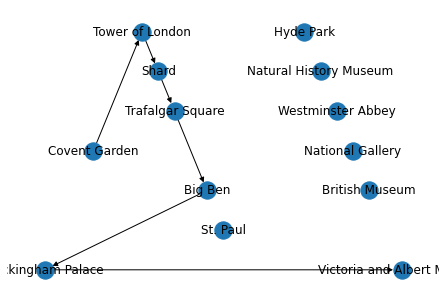

In [64]:
import networkx as nx 
import matplotlib.pyplot as plt 
  
g = nx.DiGraph() 
g.add_nodes_from(location)
for l1 in location:
    for l2 in location:
        if successive_locations[l1,l2].x > 0.9:
            g.add_edge(l1, l2) 
nx.draw_planar(g,with_labels = True)